In [33]:
!pip install prophet


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/25elgusx.json



Forecasting for 100 days...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/doadygi9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27434', 'data', 'file=/tmp/tmp148da4f0/25elgusx.json', 'init=/tmp/tmp148da4f0/doadygi9.json', 'output', 'file=/tmp/tmp148da4f0/prophet_modelwga9a1ub/prophet_model-20241129170923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:09:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:10:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


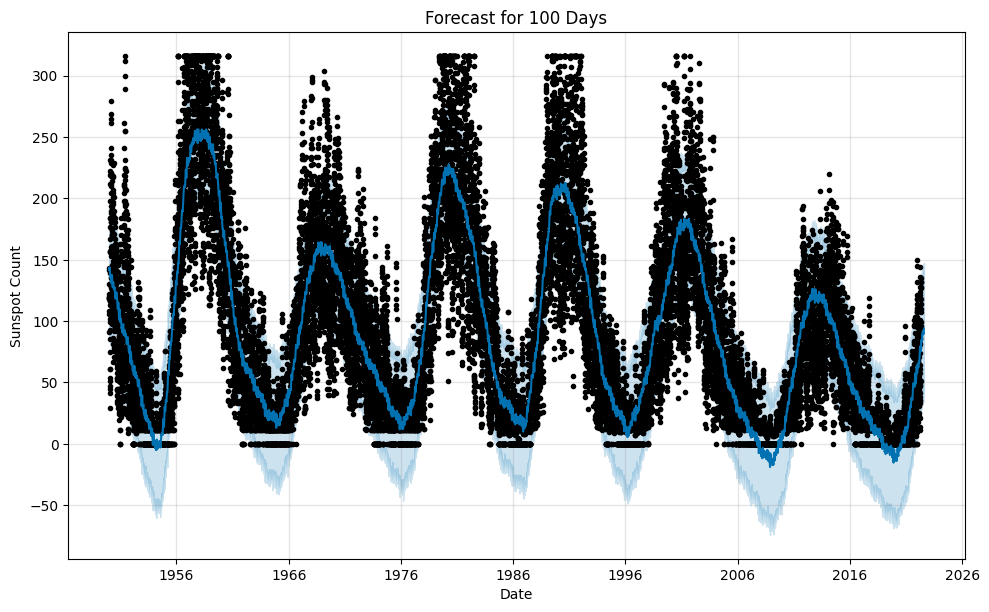

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/3ms8i13y.json


Forecasted Values for 100 Days:
              ds       yhat
26418 2022-05-01  77.675756
26419 2022-05-02  78.413965
26420 2022-05-03  79.018260
26421 2022-05-04  79.860737
26422 2022-05-05  80.550508
...          ...        ...
26513 2022-08-04  92.457313
26514 2022-08-05  92.796346
26515 2022-08-06  92.839003
26516 2022-08-07  93.143218
26517 2022-08-08  93.853126

[100 rows x 2 columns]
Evaluation Metrics for 100 Days: {'MAE': 29.262456329661347, 'SMAPE': 53.372767915907616, 'R²': 0.756578907291959}

Forecasting for 200 days...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/64j1vmq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27290', 'data', 'file=/tmp/tmp148da4f0/3ms8i13y.json', 'init=/tmp/tmp148da4f0/64j1vmq0.json', 'output', 'file=/tmp/tmp148da4f0/prophet_modelxkmigv38/prophet_model-20241129171009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:10:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:10:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


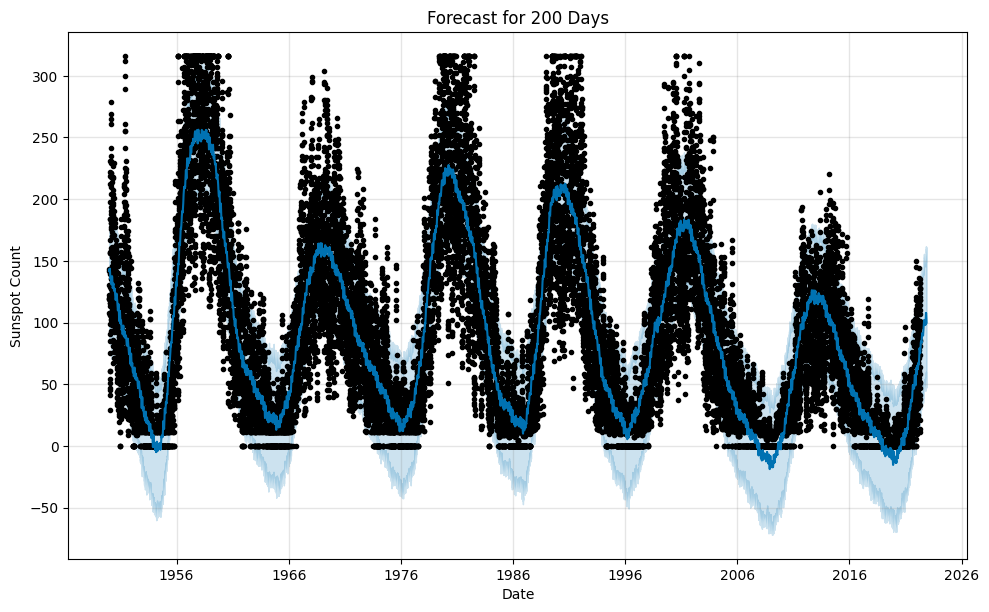

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasted Values for 200 Days:
              ds        yhat
26418 2022-05-01   77.675756
26419 2022-05-02   78.413965
26420 2022-05-03   79.018260
26421 2022-05-04   79.860737
26422 2022-05-05   80.550508
...          ...         ...
26613 2022-11-12  101.777073
26614 2022-11-13  100.959422
26615 2022-11-14  100.568441
26616 2022-11-15  100.082344
26617 2022-11-16   99.896309

[200 rows x 2 columns]
Evaluation Metrics for 200 Days: {'MAE': 29.262456329661347, 'SMAPE': 53.372767915907616, 'R²': 0.756578907291959}

Forecasting for 365 days...


DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/3_z_qe6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp148da4f0/roc_w3g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24700', 'data', 'file=/tmp/tmp148da4f0/3_z_qe6o.json', 'init=/tmp/tmp148da4f0/roc_w3g7.json', 'output', 'file=/tmp/tmp148da4f0/prophet_modelgyygvw61/prophet_model-20241129171055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


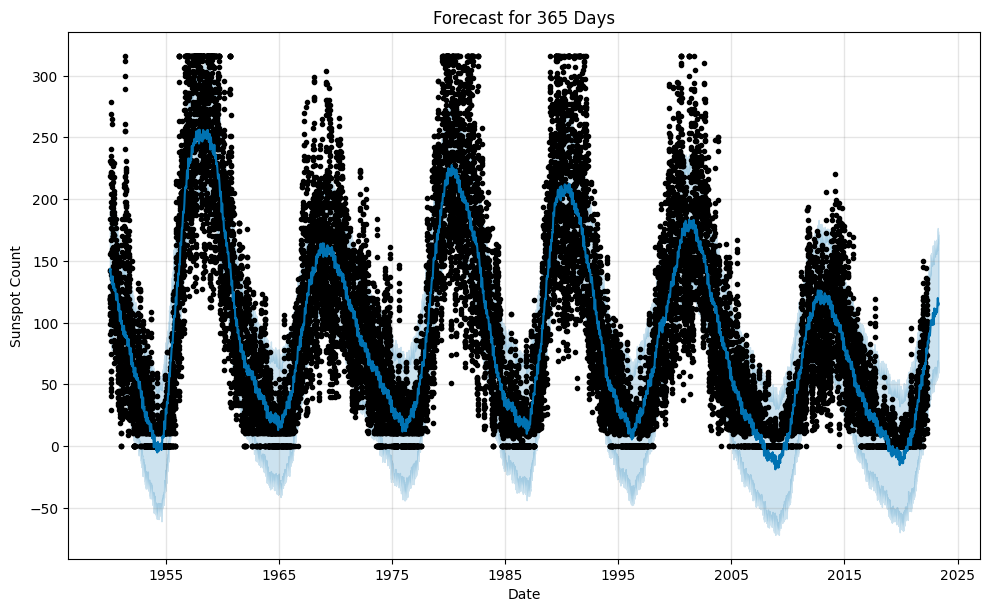

Forecasted Values for 365 Days:
              ds        yhat
26418 2022-05-01   77.675756
26419 2022-05-02   78.413965
26420 2022-05-03   79.018260
26421 2022-05-04   79.860737
26422 2022-05-05   80.550508
...          ...         ...
26778 2023-04-26  114.882377
26779 2023-04-27  115.227448
26780 2023-04-28  115.412908
26781 2023-04-29  115.326754
26782 2023-04-30  115.523326

[365 rows x 2 columns]
Evaluation Metrics for 365 Days: {'MAE': 29.262456329661347, 'SMAPE': 53.372767915907616, 'R²': 0.756578907291959}


In [51]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Step 1: Preprocess the dataset
def preprocess_sunspot_data(df, time_unit):
    """
    Cleans and prepares the sunspot dataset for time series modeling.
    """
    if time_unit == "daily":
        df['ds'] = pd.to_datetime(df[0].astype(str) + '-' + df[1].astype(str) + '-' + df[2].astype(str), errors='coerce')
        df['y'] = df[4].replace(-1, None)  # Replace missing values (-1) with NaN
    elif time_unit == "monthly":
        df['ds'] = pd.to_datetime(df[0].astype(str) + '-' + df[1].astype(str) + '-01', errors='coerce')
        df['y'] = df[3].replace(-1, None)  # Replace missing values (-1) with NaN
    elif time_unit == "yearly":
        df['ds'] = pd.to_datetime(df[0].astype(int).astype(str) + '-01-01', errors='coerce')
        df['y'] = df[1].replace(-1, None)  # Replace missing values (-1) with NaN
    return df[['ds', 'y']].dropna()

# Step 2: Filter invalid and out-of-bound dates
def clean_date_values(df):
    """
    Filters out invalid or out-of-bound dates and constrains to recent years.
    """
    df = df[df['ds'].notnull()]  # Remove rows where 'ds' is NaT
    df = df[(df['ds'] >= '1950-01-01') & (df['ds'] <= '2022-04-30')]  # Constrain to recent data for faster runtime
    return df

# Step 3: Handle outliers in the data
def handle_outliers(data):
    """
    Clips extreme outliers to avoid skewing model predictions.
    """
    q1 = data['y'].quantile(0.25)
    q3 = data['y'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data['y'] = data['y'].clip(lower_bound, upper_bound)
    return data

# Step 4: Build and forecast with fine-tuned Prophet
def build_fine_tuned_model(data, forecast_periods):
    """
    Builds a fine-tuned Prophet model and forecasts future values.
    """
    model = Prophet(
        growth="linear",
        changepoint_prior_scale=0.1,  # Increase sensitivity to trend changes
        seasonality_prior_scale=5.0  # Reduce overfitting to seasonality
    )
    model.add_seasonality(name='11_year_cycle', period=11 * 365.25, fourier_order=3)  # Simplified seasonalities
    model.fit(data)

    # Generate predictions
    future = model.make_future_dataframe(periods=forecast_periods)
    forecast = model.predict(future)
    return model, forecast

# Step 5: Evaluate the model
def evaluate_model(y_true, y_pred):
    """
    Evaluates the model using adjusted MAE, SMAPE, and R² metrics.
    """
    epsilon = 1e-5  # Small constant to avoid division by zero
    y_true = np.where(y_true < epsilon, epsilon, y_true)  # Replace small actual values
    y_pred = np.where(y_pred < epsilon, epsilon, y_pred)  # Replace small predicted values

    # Calculate metrics
    mae = mean_absolute_error(y_true, y_pred)
    smape = np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100
    r2 = r2_score(y_true, y_pred)

    return {"MAE": mae, "SMAPE": smape, "R²": r2}

# Step 6: Forecast for multiple horizons
def forecast_for_horizons(data, horizons):
    """
    Generates and displays forecasts for multiple horizons for daily data.
    """
    results = {}
    for horizon in horizons:
        print(f"\nForecasting for {horizon} days...")

        # Build and forecast
        model, forecast = build_fine_tuned_model(data, horizon)

        # Plot the results
        model.plot(forecast)
        plt.title(f"Forecast for {horizon} Days")
        plt.xlabel("Date")
        plt.ylabel("Sunspot Count")
        plt.show()

        # Extract future predictions only
        future_predictions = forecast[['ds', 'yhat']].tail(horizon)
        print(f"Forecasted Values for {horizon} Days:")
        print(future_predictions)

        # Evaluate model
        evaluation = evaluate_model(data['y'], forecast['yhat'][:len(data)])
        results[horizon] = {"Evaluation Metrics": evaluation, "Forecast": future_predictions}
        print(f"Evaluation Metrics for {horizon} Days: {evaluation}")
    return results

# Load dataset
file_path = 'SN_d_tot_V2.0.csv'  # Replace with the actual file path
time_unit = "daily"  # Specify the time unit for the dataset: "daily", "monthly", or "yearly"

# Load and preprocess the dataset
df = pd.read_csv(file_path, delimiter=';', header=None)
data = preprocess_sunspot_data(df, time_unit)
data = clean_date_values(data)
data = handle_outliers(data)

# Define forecast horizons
horizons = [100, 200, 365]  # Forecast for 100, 200, and 365 days

# Forecast and evaluate
forecast_results = forecast_for_horizons(data, horizons)
